1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

Values of x, y starting from (-0.7,-0.7):  [ 0.07783937 -0.61875886]  with function value of:  -0.5862576715836622


<Figure size 640x480 with 0 Axes>

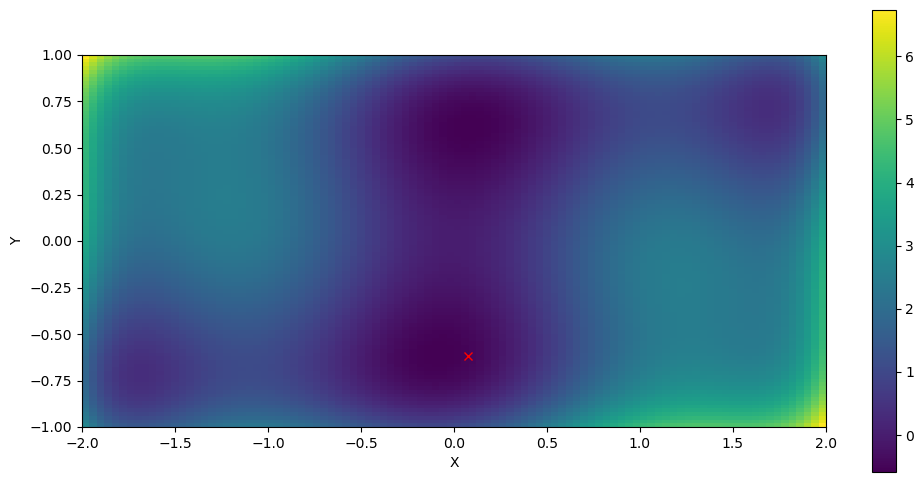

<Figure size 640x480 with 0 Axes>

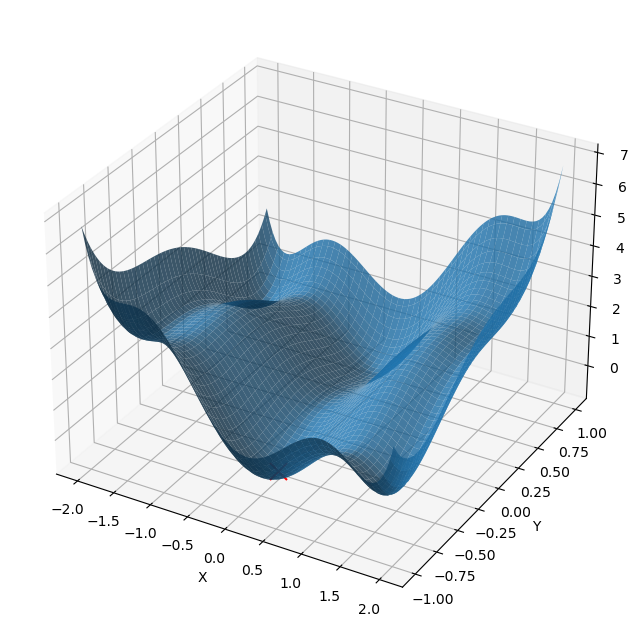

What happens for an initial guess of $(x, y) = (0, 0)$?
Values of x, y starting from (0,0): [0. 0.]  with function value of:  0.0


In [2]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
from scipy.optimize import minimize
import pylab

# six-hump camelback function
def f(x):
    return (4 - 2.1*x[0]**2 + 1/3*x[0]**4)*x[0]**2+x[0]*x[1]+(4*x[1]**2-3)*x[1]**2

# restrict variables (−2<x<2 & −1<x<1)
N = 100
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 1, N)

# Create grid for visualization
x_grid, y_grid = np.meshgrid(x, y)

# Find the minima starting from (-0.7,-0.7)
min_solution1 = optimize.minimize(f, (-0.7,-0.7))
print("Values of x, y starting from (-0.7,-0.7): ", min_solution1["x"], " with function value of: ", min_solution1["fun"])

plt.figure()
fig, axes = plt.subplots(figsize = (12, 6))
image = pylab.imshow(f([x_grid, y_grid]), extent=[-2, 2, -1, 1])
axes.plot(min_solution1["x"][0],min_solution1["x"][1], marker="x", color = "r")
plt.colorbar()
axes.set_xlabel("X")
axes.set_ylabel("Y")

plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (8,8))
surf = ax.plot_surface(x_grid, y_grid, f([x_grid,y_grid]),alpha = 0.8)
ax.scatter(min_solution1["x"][0], min_solution1["x"][1], f(min_solution1["x"]), color = "r", marker="x", s = 150)
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()


# With initial guess (0,0)
min_solution2 = optimize.minimize(f, (0,0))

print("What happens for an initial guess of $(x, y) = (0, 0)$?")
print("Values of x, y starting from (0,0):", min_solution2["x"], " with function value of: ", min_solution2["fun"])

2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

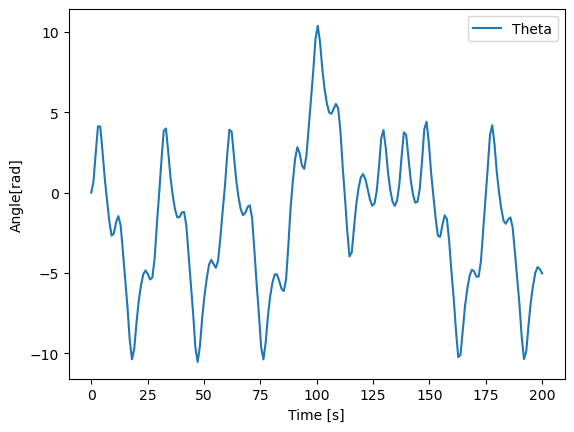

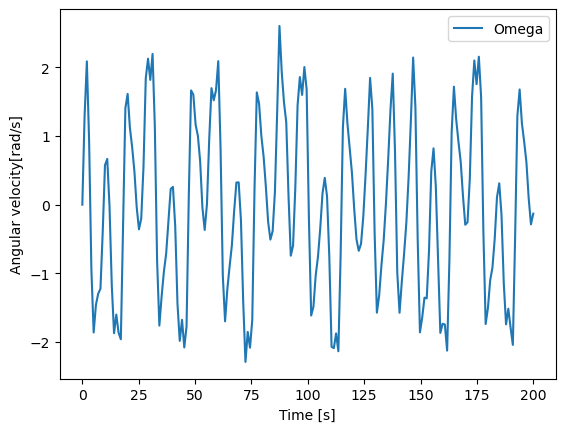

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE function
def pendulum(y, t, Q, d, Omega):
    theta, omega = y
    return [omega, -(1/Q)*omega + np.sin(theta) + d*np.cos(Omega*t)]

# Initial conditions and parameters
theta0 = 0
omega0 = 0

Q = 2.0
d = 1.5
Omega = 0.65

# Time points
t = np.linspace(0, 200, 200)

# Solve ODE
sol = odeint(pendulum, [theta0, omega0], t, args=(Q, d, Omega))

# Extract variables
theta = sol[:, 0]
omega = sol[:, 1]

# Plot Theta
plt.figure()
plt.plot(t, theta, label='Theta')
plt.ylabel("Angle[rad]")
plt.xlabel("Time [s]")
plt.legend()

# Plot Omega
plt.figure()
plt.plot(t, omega, label='Omega')
plt.ylabel("Angular velocity[rad/s]")
plt.xlabel("Time [s]")
plt.legend()
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

<Figure size 640x480 with 0 Axes>

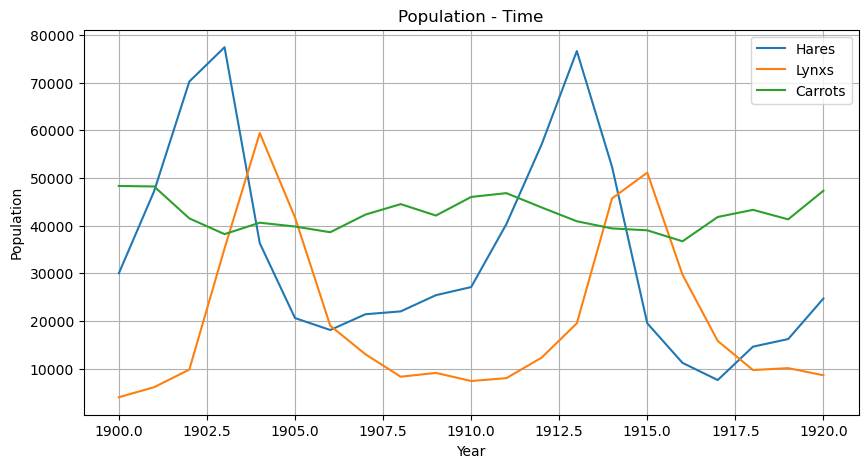

<Figure size 640x480 with 0 Axes>

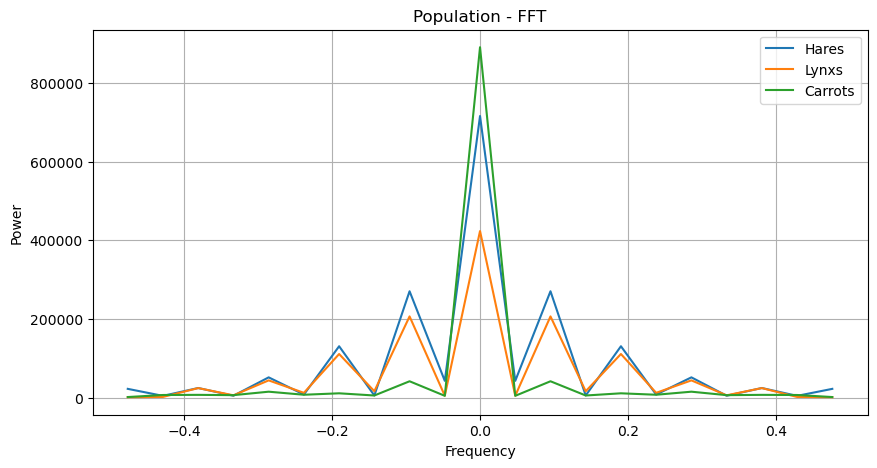

In [6]:
#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

from scipy import fftpack

# Import animals data
animals_data = np.loadtxt('./data/populations.txt')
years = animals_data[:,0]
hares = animals_data[:,1]
lynxs = animals_data[:,2]
carrots = animals_data[:,3]

# First plot - data in time
plt.figure()
fig, ax1 = plt.subplots(figsize = (10, 5))
ax1.plot(years, hares , label = 'Hares') 
ax1.plot(years, lynxs , label = 'Lynxs') 
ax1.plot(years, carrots , label = 'Carrots') 

ax1.set_title('Population - Time')
ax1.set_ylabel('Population')
ax1.set_xlabel('Year')
ax1.grid()
ax1.legend()

time_step = 1

# Compute the fft, power and return the corresponding frequencies
H_hares = fftpack.fft(hares)
pow_hares = np.abs(H_hares)
freq_hares = fftpack.fftfreq(hares.size, d = time_step)
sorted_f1 = sorted(freq_hares)

H_lynxs = fftpack.fft(lynxs)
pow_lynxes = np.abs(H_lynxs)
freq_lynxs = fftpack.fftfreq(lynxs.size, d = time_step)
sorted_f2 = sorted(freq_lynxs)

H_carrots = fftpack.fft(carrots)
pow_carrots = np.abs(H_carrots)
freq_carrots = fftpack.fftfreq(carrots.size, d = time_step)
sorted_f3 = sorted(freq_carrots)

pow_hares = pow_hares[np.argsort(np.array(freq_hares))]
pow_lynxes = pow_lynxes[np.argsort(np.array(freq_lynxs))]
pow_carrots = pow_carrots[np.argsort(np.array(freq_carrots))]


# Plot the fft
plt.figure()
fig, ax2 = plt.subplots(figsize = (10, 5))
ax2.plot(sorted(freq_hares), pow_hares, label='Hares')
ax2.plot(sorted(freq_lynxs), pow_lynxes, label='Lynxs')
ax2.plot(sorted(freq_carrots), pow_carrots, label='Carrots')
ax2.set_title('Population - FFT')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power')
ax2.legend()
ax2.grid()

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Filtered image - Gray Scale')

<Figure size 640x480 with 0 Axes>

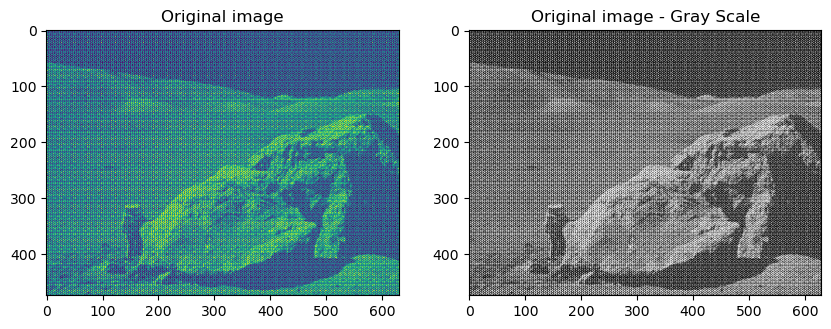

<Figure size 640x480 with 0 Axes>

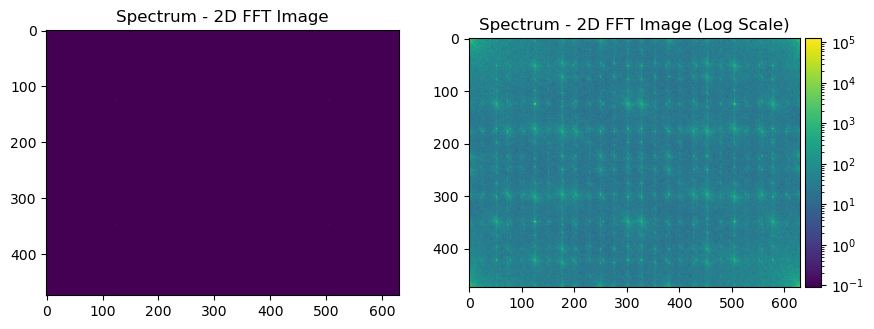

<Figure size 640x480 with 0 Axes>

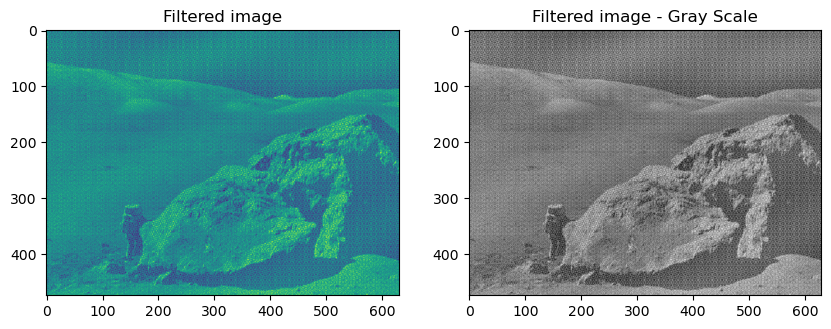

In [7]:
import pylab
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load image
img = pylab.imread('./data/moonlanding.png')

# Plot the image
plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(10, 10))
axes[0].imshow(img)
axes[0].set_title('Original image')
axes[1].imshow(img,  cmap='gray')
axes[1].set_title('Original image - Gray Scale')

# 2D FFT
img_fft_2d = fftpack.fft2(img)

plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(10, 10))
axes[0].imshow(np.abs(img_fft_2d))
axes[0].set_title('Spectrum - 2D FFT Image')

# display the absolute value of the specture in log scale
c = axes[1].imshow(np.abs(img_fft_2d),  norm=LogNorm(vmin=np.min(np.abs(img_fft_2d)), vmax=np.max(np.abs(img_fft_2d))))
axes[1].set_title('Spectrum - 2D FFT Image (Log Scale)')
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(c, cax = cax)

# Set high frequencies to 0
img_fft_2d[np.abs(img_fft_2d) > 3000] = 0

# Inverse Fourier transform
ifft_img = fftpack.ifft2(img_fft_2d).real

# Plot the result image
plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(10, 10))
axes[0].imshow(ifft_img)
axes[0].set_title('Filtered image')
axes[1].imshow(ifft_img,  cmap='gray')
axes[1].set_title('Filtered image - Gray Scale')